In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from src.monte_carlo import get_mc_mean_reward
from src.q_learning import run_qlearning
from src.tools import set_notebook_params, plot_hist, plot_learning_curve

In [3]:
set_notebook_params()

# Часть первая, с блекджеком и стратегиями

In [4]:
SAMPLES_CNT = 1000
EXPERIMENTS_CNT = 1000

In [5]:
rewards_lst = get_mc_mean_reward(
    samples_cnt=SAMPLES_CNT,
    exp_cnt=EXPERIMENTS_CNT
)
print(f"Mean reward: {np.mean(rewards_lst):.3f}")

100%|████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.36it/s]

Mean reward: -0.437


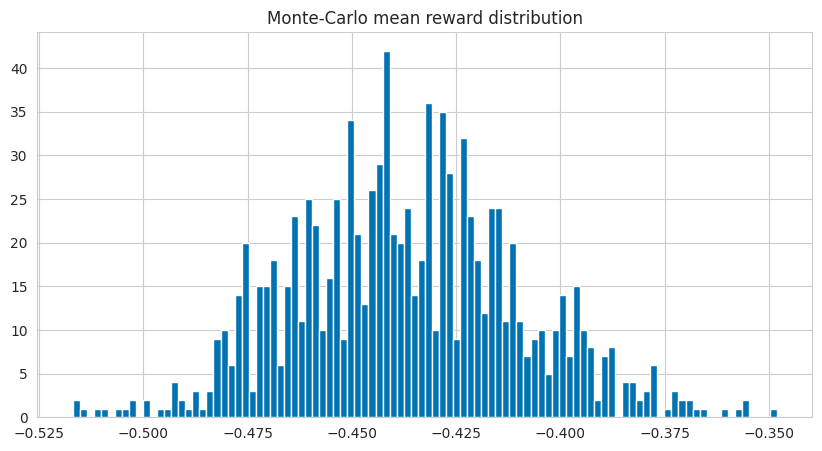

In [6]:
plot_hist(rewards_lst, "Monte-Carlo mean reward distribution")

Не трудно видеть, что такая простая стратегия не позволяет обыграть дилера. При использовании относительно простого метода Монте-Карло, удается проиграть казино `-0,43`.
Причем, судя по распределению награды, данная стратегия не позволяет выиграть даже в самых оптимистичных случаях, т.к. даже точки, лежащие на максимальном удалении от среднего, значительно удалены от нуля.

# Часть вторая, удвоенная

In [7]:
EPISODES = 100_000
ALPHA = 0.08
EPSILON = 0.6
GAMMA = 0.02

In [8]:
rewards_lst = run_qlearning(
    episodes_cnt=EPISODES,
    alpha=ALPHA,
    epsilon=EPSILON,
    gamma=GAMMA,
    with_count=False
)
print(f"Best reward: {rewards_lst[-1]:.3f}")

100%|██████████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3858.61it/s]

Best reward: -0.069


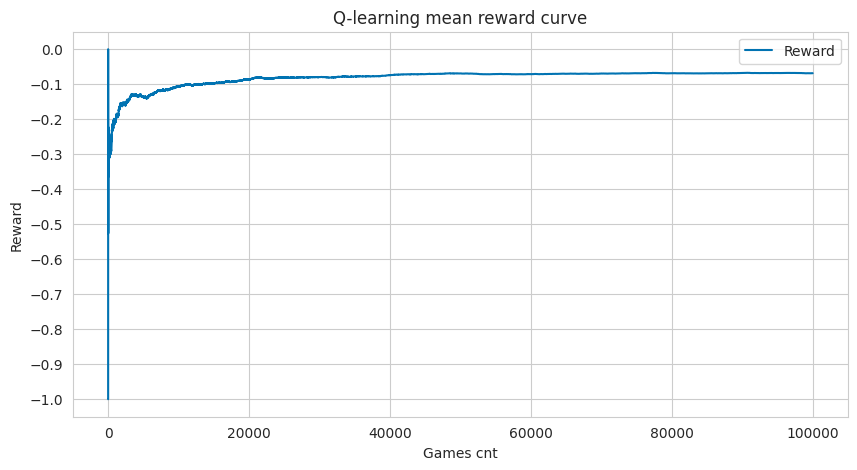

In [9]:
plot_learning_curve(rewards_lst, "Q-learning mean reward curve")

Среднее значение награды после обучения превысило значение, полученное методом Монте-Карло, что говорит об более высокой эффективности Q-learning в сравнение с предыдущим методом на данной задаче

# Часть третья, в главной роли — Дастин Хоффман

In [10]:
EPISODES = 100_000
ALPHA = 0.08
EPSILON = 0.6
GAMMA = 0.02

In [11]:
rewards_lst = run_qlearning(
    episodes_cnt=EPISODES,
    alpha=ALPHA,
    epsilon=EPSILON,
    gamma=GAMMA,
    with_count=True
)
print(f"Best reward: {rewards_lst[-1]:.3f}")

100%|██████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3506.66it/s]

Best reward: -0.076


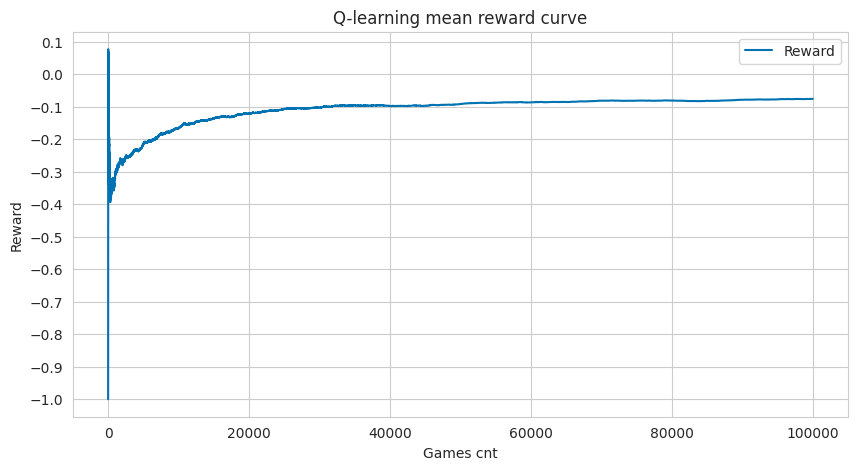

In [12]:
plot_learning_curve(rewards_lst, "Q-learning mean reward curve")

В последнем подходе реализован метод подсчета карт ["плюс-минус"](https://ru.wikipedia.org/wiki/%D0%91%D0%BB%D1%8D%D0%BA%D0%B4%D0%B6%D0%B5%D0%BA).
Данный метод показывает результаты, сопостовимые с результатами без подсчета. Тем не менее, подсчет карт в данном случае не показывает прироста награды.
Думаю, это можно объяснить большим количеством различных стостояний, получившимся, из-за удвоения.